In [1]:
library(lubridate)
library(worldmet)
library(ggplot2)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
dataMto.hour <- importNOAA(code = "080550-99999",
                      year = 2013:2021,
                      hourly = TRUE,
                      n.cores = 4,
                      quiet = FALSE,
                      path = NA
                     )

---

In [3]:
dataMto.all <- importNOAA(code = "080550-99999",
                      year = 2013:2021,
                      hourly = FALSE,
                      n.cores = 4,
                      quiet = FALSE,
                      path = NA
                     )

In [4]:
head(dataMto.all)

date,code,station,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,⋯,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_12,precip_6,precip,pwc
<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2013-01-01 05:00:00,080550-99999,"LEON, SP",42.589,-5.655556,916.22,0.0,NA,0.0,NA,⋯,NA,NA,2,600,NA,NA,NA,NA,NA,NA
2013-01-01 06:00:00,080550-99999,"LEON, SP",42.589,-5.655556,916.22,4.1,280,2.8,NA,⋯,NA,NA,2,1050,NA,NA,5,NA,NA,NA
2013-01-01 07:00:00,080550-99999,"LEON, SP",42.589,-5.655556,916.22,4.1,270,2.0,NA,⋯,NA,NA,4,1350,NA,NA,NA,NA,0,NA
2013-01-01 08:00:00,080550-99999,"LEON, SP",42.589,-5.655556,916.22,3.1,270,2.0,NA,⋯,NA,NA,4,1350,NA,NA,NA,NA,0,NA
2013-01-01 09:00:00,080550-99999,"LEON, SP",42.589,-5.655556,916.22,2.1,290,3.6,NA,⋯,NA,NA,4,1350,NA,NA,NA,NA,0,NA
2013-01-01 10:00:00,080550-99999,"LEON, SP",42.589,-5.655556,916.22,1.5,290,6.0,NA,⋯,NA,NA,2,1350,NA,NA,NA,NA,0,NA


In [5]:
dataMto.all$date <- floor_date(dataMto.all$date, unit="hour")

In [6]:
all.2.hour <- aggregate(dataMto.all[,7:ncol(dataMto.all)-1], 
                        by=list(dataMto.all$date), 
                        mean, na.rm=T)
head(all.2.hour)

,Group.1,elev,ws,wd,air_temp,atmos_pres,visibility,dew_point,RH,ceil_hgt,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_12,precip_6,precip
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-01 05:00:00,916.22,0.0,NaN,0.0,NaN,11265,0.0,100.00000,22000,2,NaN,NaN,2,600,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 06:00:00,916.22,4.1,280,2.8,NaN,20000,1.8,93.22413,22000,2,NaN,NaN,2,1050,NaN,NaN,5,NaN,NaN
3,2013-01-01 07:00:00,916.22,4.1,270,2.0,NaN,11265,1.0,93.18257,22000,4,NaN,NaN,4,1350,NaN,NaN,NaN,NaN,0
4,2013-01-01 08:00:00,916.22,3.1,270,2.0,NaN,11265,2.0,100.00000,22000,4,NaN,NaN,4,1350,NaN,NaN,NaN,NaN,0
5,2013-01-01 09:00:00,916.22,2.1,290,3.6,NaN,30000,2.7,93.92031,22000,4,NaN,NaN,4,1350,NaN,NaN,NaN,NaN,0
6,2013-01-01 10:00:00,916.22,1.5,290,6.0,NaN,11265,4.0,87.15688,22000,2,NaN,NaN,2,1350,NaN,NaN,NaN,NaN,0


In [7]:
sum(is.na(all.2.hour))
sum(!is.na(all.2.hour))

sum(is.na(all.2.hour)) + sum(!is.na(all.2.hour))

nrow(all.2.hour)

[1] 682494

[1] 641406

[1] 1323900

[1] 66195

In [8]:
min(all.2.hour$Group.1)
max(all.2.hour$Group.1)

[1] "2013-01-01 05:00:00 UTC"

[1] "2021-01-28 21:00:00 UTC"

---

In [9]:
head(dataMto.hour[,c(3, 7:ncol(dataMto.all)-1)])

date,elev,ws,wd,air_temp,atmos_pres,visibility,dew_point,RH,ceil_hgt,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_12,precip_6,precip
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,916.22,0.0,NA,0.0,NA,11265,0.0,100.00000,22000,2,NA,NA,2,600,NA,NA,NA,NA,NA
2013-01-01 06:00:00,916.22,4.1,280,2.8,NA,20000,1.8,93.22413,22000,2,NA,NA,2,1050,NA,NA,5,NA,NA
2013-01-01 07:00:00,916.22,4.1,270,2.0,NA,11265,1.0,93.18257,22000,4,NA,NA,4,1350,NA,NA,NA,NA,0
2013-01-01 08:00:00,916.22,3.1,270,2.0,NA,11265,2.0,100.00000,22000,4,NA,NA,4,1350,NA,NA,NA,NA,0
2013-01-01 09:00:00,916.22,2.1,290,3.6,NA,30000,2.7,93.92031,22000,4,NA,NA,4,1350,NA,NA,NA,NA,0
2013-01-01 10:00:00,916.22,1.5,290,6.0,NA,11265,4.0,87.15688,22000,2,NA,NA,2,1350,NA,NA,NA,NA,0


In [10]:
a <- dataMto.hour[,c(3,7:ncol(dataMto.all)-1)]
a <- a[rowSums(is.na(a)) != nrow(a),]

sum(is.na(a))
sum(!is.na(a))

sum(is.na(a)) + sum(!is.na(a))
nrow(a)

[1] 769704

[1] 645996

[1] 1415700

[1] 70785

In [11]:
head(a)

date,elev,ws,wd,air_temp,atmos_pres,visibility,dew_point,RH,ceil_hgt,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_12,precip_6,precip
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,916.22,0.0,NA,0.0,NA,11265,0.0,100.00000,22000,2,NA,NA,2,600,NA,NA,NA,NA,NA
2013-01-01 06:00:00,916.22,4.1,280,2.8,NA,20000,1.8,93.22413,22000,2,NA,NA,2,1050,NA,NA,5,NA,NA
2013-01-01 07:00:00,916.22,4.1,270,2.0,NA,11265,1.0,93.18257,22000,4,NA,NA,4,1350,NA,NA,NA,NA,0
2013-01-01 08:00:00,916.22,3.1,270,2.0,NA,11265,2.0,100.00000,22000,4,NA,NA,4,1350,NA,NA,NA,NA,0
2013-01-01 09:00:00,916.22,2.1,290,3.6,NA,30000,2.7,93.92031,22000,4,NA,NA,4,1350,NA,NA,NA,NA,0
2013-01-01 10:00:00,916.22,1.5,290,6.0,NA,11265,4.0,87.15688,22000,2,NA,NA,2,1350,NA,NA,NA,NA,0


In [12]:
min(dataMto.hour$date)
max(dataMto.hour$date)

[1] "2013-01-01 05:00:00 UTC"

[1] "2021-01-28 21:00:00 UTC"

Warning message:
"Removed 62397 rows containing missing values (geom_point)."
Warning message:
"Removed 57807 rows containing missing values (geom_point)."


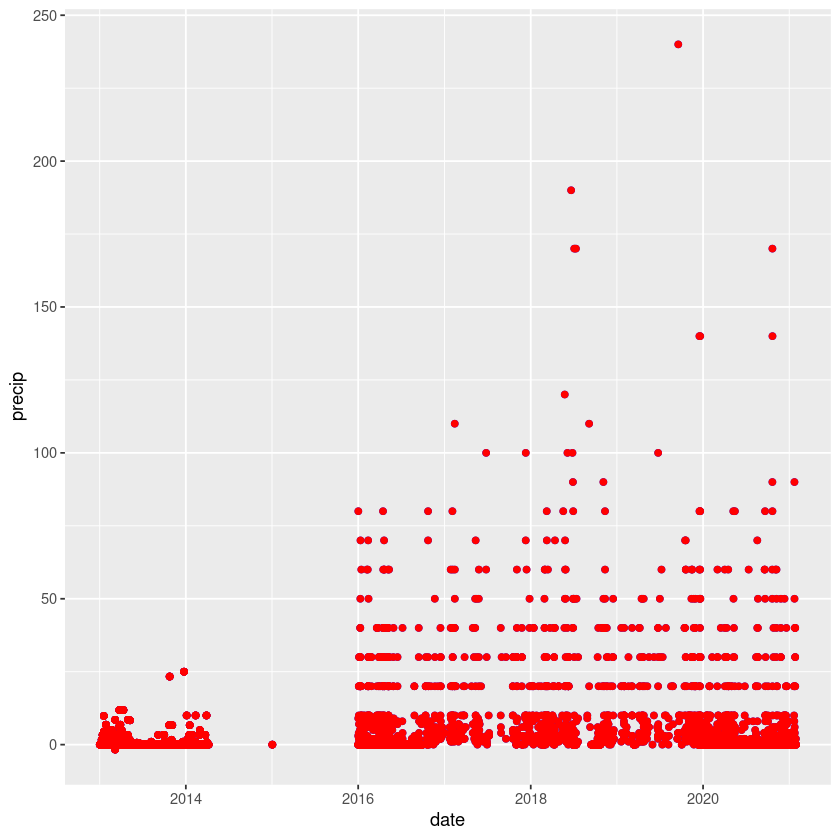

In [13]:
ggplot() +
    geom_point(data=dataMto.hour[, c("date", "precip")], aes(x=date, y=precip), color="blue") +
    #+ ylim(0, 10)# +
    #xlim(ymd_hms("2020-01-01 00:00:00"), ymd_hms("2021-01-01 00:00:00"))
    geom_point(data=all.2.hour[, c("Group.1", "precip")], aes(x=Group.1, y=precip), color="red")